# Part I - Ames Data Housing)
## by (David Babayo)

## Introduction
> This data set includes information about houses with multiple features with the important feature being "SalePrice" which we would at the end of this we would have models which we would use to predict this particular feature based on the house features.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.shape

(2930, 81)

In [5]:
df.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [7]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

> There are 2930 records in the dataset and 81 features, the features comprimises of both numeric and categorical data types.

> Opening the datasets description file for better insight 

In [8]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Wrangling /Data cleaning

> In this section I want to clean the data, deal with missing data, wrong data types and also outliers if any

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

>From above we can see there are alot of missing data in multiple columns

In [10]:
df.head(30)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [11]:
df = df.drop('PID',axis=1)

In [12]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

>checking percentages of missing data for columns using a function to make things easier

In [13]:
#function for returning missing percentage
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [14]:
percent_missing(df)

Electrical         0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

>Dropping columns with more 50 percent of the features missing

In [15]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [16]:
percent_missing(df)

Total Bsmt SF      0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Garage Area        0.034130
Electrical         0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Cond        5.426621
Garage Qual        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
dtype: float64

>going through the description text i have decided to fill the null values of some of the categorical columns as "None" instead of dropping them, as some houses have no features such as basements, fireplace, garages etc

In [17]:
cat_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type','Garage Type',
                  'Garage Finish', 'Garage Qual', 'Garage Cond','Fireplace Qu']
df[cat_cols] = df[cat_cols].fillna('None')

In [18]:
percent_missing(df)

BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Garage Cars        0.034130
Garage Area        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Garage Yr Blt      5.426621
Lot Frontage      16.723549
dtype: float64

>Doing the same for a few numerical columns assuming they dont have associated properties such as basements; No basements means no basement measurements

In [19]:
num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
            'Mas Vnr Area','Garage Yr Blt','Lot Frontage']
df[num_cols] = df[num_cols].fillna(0)

In [20]:
percent_missing(df)

Electrical     0.03413
Garage Cars    0.03413
Garage Area    0.03413
dtype: float64

>dropping the remaining rows as they are minimal and wont affect performance of the models

In [21]:
df.dropna(axis=0,inplace=True)

In [22]:
percent_missing(df)

Series([], dtype: float64)

>all missing data have been dealt with appropriately now moving on to vizualisations dealing with outliers if any

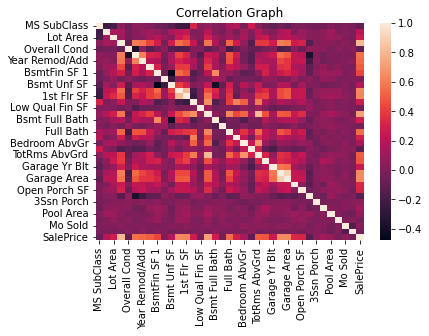

In [23]:
#checking the correlation between the 'SalePrice' and other column features
plt.title('Correlation Graph')
sns.heatmap(df.corr());

In [24]:
df.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128629
Kitchen AbvGr     -0.119857
Overall Cond      -0.101686
MS SubClass       -0.085031
Low Qual Fin SF   -0.037680
Bsmt Half Bath    -0.035864
Yr Sold           -0.030640
Misc Val          -0.015708
BsmtFin SF 2       0.005964
3Ssn Porch         0.032207
Mo Sold            0.035093
Pool Area          0.068394
Screen Porch       0.112105
Bedroom AbvGr      0.143952
Bsmt Unf SF        0.183233
Lot Frontage       0.201886
Garage Yr Blt      0.253709
Lot Area           0.266537
2nd Flr SF         0.269685
Bsmt Full Bath     0.275742
Half Bath          0.285140
Open Porch SF      0.312882
Wood Deck SF       0.327259
BsmtFin SF 1       0.433208
Fireplaces         0.474540
TotRms AbvGrd      0.495490
Mas Vnr Area       0.502161
Year Remod/Add     0.533295
Full Bath          0.545879
Year Built         0.558672
1st Flr SF         0.621711
Total Bsmt SF      0.632673
Garage Area        0.640397
Garage Cars        0.647908
Gr Liv Area        0.706927
Overall Qual       0

>Turns out the overall quality has the highest impact on the sales column

C:\Users\David\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


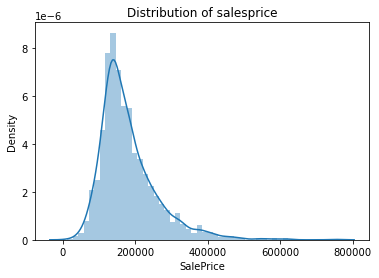

In [25]:
plt.title('Distribution of salesprice')
sns.distplot(df["SalePrice"]);

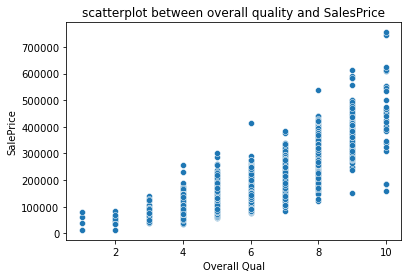

In [26]:
plt.title('scatterplot between overall quality and SalesPrice')
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

>from above we see the scatterplot showing us the positive correlation between the two 

>we can also the presence of outliers which i would get rid off later on

In [27]:
#taking a closer look at the outliers
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,60,RL,0.0,24572,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,16,0,0,0,0,6,2008,WD,Family,150000
1498,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


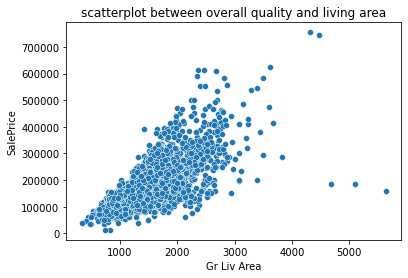

In [28]:
#checking the scatterplot between salesprice and the feature which has the second the highest positive correlation in the dataset
plt.title('scatterplot between overall quality and living area')
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

>apart from the positive correlation we see in the chart we can also notice the outliers which we would now drop

In [29]:
#taking a closer look at the outliers
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


>the records are the same in both plots ,we are going to drop them using their indexes

In [30]:
#dropping the records using the indexes
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(ind_drop,axis=0)

In [31]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


## Making the predictive models

>Many machine learning models can not deal with string categorical data so we need to turn these categorical data into dummy variables

In [32]:
#seperating the dataset into categorical and non categorical data
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

> making the dummy variables

In [33]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [34]:
#merging the two back to a single dataset
df_1 = pd.concat([df_nums,df_objs],axis=1)

In [35]:
df_1.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


>Right!

>Lets get back to making the predictive models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X=df_1.drop('SalePrice',axis=1)
y=df_1['SalePrice']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
#Scalling the data
scaler=StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Elastic Net Model

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from math import sqrt

In [42]:
base_elastic_model = ElasticNet()

In [43]:
param_grid = {'alpha':[0.1,1,5,10,20,30,40,50,60,70,80,90,100],
              'l1_ratio':[.1, .25, .5, .7, .75, .9, .95, .99, 1]}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=2)

In [46]:
grid_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 117 candidates, totalling 1170 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.5s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.1, l1_ratio=0.25; total time=   0.3s
[CV] END ...........................alpha=0.

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+11, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.2s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+11, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.2s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+11, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.559e+11, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+11, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.2s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.792e+11, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+11, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.2s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+11, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.2s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+11, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   1.2s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.737e+11, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.961e+11, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+11, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.967e+11, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.847e+11, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.067e+11, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.219e+11, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.285e+11, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.822e+11, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   1.1s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.295e+11, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+11, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+11, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.524e+11, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.551e+11, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.528e+11, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+11, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.215e+11, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.438e+11, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.218e+11, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e+11, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.118e+11, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.493e+11, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.513e+11, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.496e+11, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.485e+11, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.138e+11, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.457e+11, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.25; total time=   0.0s
[CV] END ...................

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+11, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.545e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.708e+11, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.493e+11, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.843e+11, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.688e+11, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.888e+11, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.587e+11, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.751e+11, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.745e+11, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.9s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.25; total time=   0.0s
[CV] END ...................

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+11, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+11, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.997e+11, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+11, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+11, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+11, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+11, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.684e+11, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e+10, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+11, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=5, l1_ratio=1; total time=   1.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.25; total time=   0.0s
[CV] END ...................

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.754e+10, tolerance: 1.534e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.542e+10, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.968e+10, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.998e+10, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.396e+09, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.113e+10, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   1.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   1.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   1.0s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+10, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   1.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.25; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.25; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+09, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+09, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.891e+09, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+09, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.862e+09, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+09, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.574e+09, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+09, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.561e+09, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   1.1s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=40, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=40, l1_ratio=0.25; total time=   0.0s
[CV] END ...................

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+09, tolerance: 1.537e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s
[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+09, tolerance: 1.569e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+09, tolerance: 1.455e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+09, tolerance: 1.567e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e+09, tolerance: 1.564e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.964e+09, tolerance: 1.548e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.816e+09, tolerance: 1.606e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.380e+09, tolerance: 1.516e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.808e+09, tolerance: 1.546e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=40, l1_ratio=1; total time=   0.9s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.25; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END ............................alpha=60, l1_ratio=0.25; total time=   0.0s
[CV] END .............................alpha=60, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=60, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=60, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=60, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=70, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=70, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=80, l1_ratio=0.75; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.75; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.75; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.75; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.75; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.75; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=90, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=90, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.4s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.4s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.4s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.4s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.7, 0.75, 0.9, 0.95,
                                      0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [48]:
y_pred = grid_model.predict(scaled_X_test)

In [49]:
MAE=mean_absolute_error(y_test,y_pred)
RMSE=sqrt(mean_squared_error(y_test,y_pred))

In [50]:
MAE

14096.403410258346

In [51]:
RMSE

20473.340162782915

### Support Vector Machines - Regression

In [52]:
from sklearn.svm import SVR,LinearSVR

In [53]:
base_model = SVR()

In [54]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [55]:
base_preds = base_model.predict(scaled_X_test)

In [56]:
MAE1=mean_absolute_error(y_test,base_preds)
RMSE1=sqrt(mean_squared_error(y_test,base_preds))

In [57]:
MAE1

54451.104997842056

In [58]:
RMSE1

76214.8564055687